# Цель проекта: отследить влияние условий жизни учащихся на их успеваемость по математике

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings #отключаю варнинги
warnings.filterwarnings('ignore')

# Определим функции, которые будем использовать

In [141]:
#определяю функцию для построения гистограм и отображения пустых значений в столбце с числовыми признаками
def number_graf(data):
    for column in data.columns:
        if str(data[column].dtype) == 'float64' or str(data[column].dtype) == 'int64': 
            fig, axes = plt.subplots(figsize = (6, 4))
            axes.hist(data[column])
            axes.set_title('Гистограмма для столбца ' + column)
            plt.show()
            print('в столбце {} количество пустных значений {}'.format(column, int(data[column].isna().sum())))

In [142]:
#определяю функцию для построения boxplot и отображения пустых значений в столбце с номинативными признаками
def nominativ_graf(data):
    for column in data.columns:
        if str(data[column].dtype) == 'object':
            fig, axes = plt.subplots(figsize = (6, 4))
            sns.boxplot(x = column,y = 'score',data = data)
            axes.set_title('Гистограмма для столбца ' + column)
            plt.show()
            print('в столбце {} количество пустных значений {}'.format(column, int(data[column].isna().sum())))

In [143]:
#определяю функцию для замены пустых значений в столбцах с числовыми признаками
def replace_nan(data):
    for column in data.columns:
        if str(data[column].dtype) == 'float64' or str(data[column].dtype) == 'int64':
            data[column] = data[column].fillna(round(data[column].mean()))

In [144]:
#определяю функцию для определния статистической разницы с помощбю теста Стьюдента
def get_stat_dif(data):
    for column in data.columns:
        if str(data[column].dtype) == 'object':
            cols = data.loc[:, column].value_counts().index[:]
            combinations_all = list(combinations(cols, 2))
            for comb in combinations_all:
                if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                                data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                    <= 0.05/len(combinations_all): # Учли поправку Бонферони
                    print('Найдены статистически значимые различия для колонки', column)
                    break

# Первичный осмотр данных

In [145]:
stud = pd.read_csv('stud_math.csv')
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [146]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Рассмотрим числовые переменные

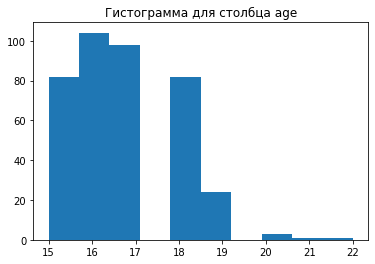

в столбце age количество пустных значений 0


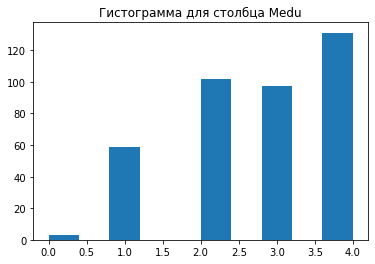

в столбце Medu количество пустных значений 3


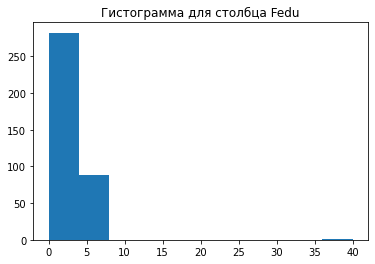

в столбце Fedu количество пустных значений 24


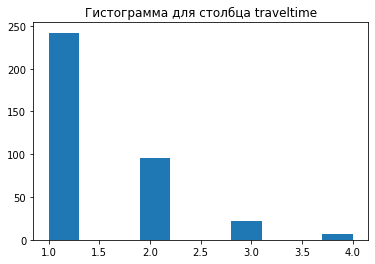

в столбце traveltime количество пустных значений 28


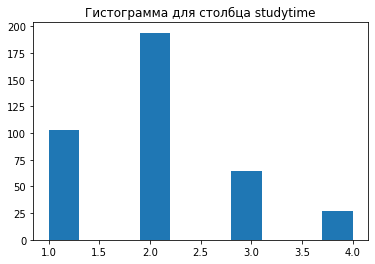

в столбце studytime количество пустных значений 7


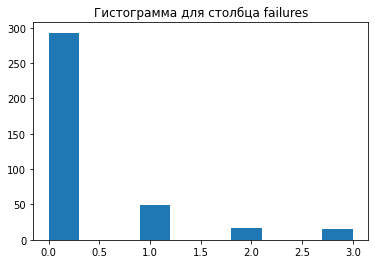

в столбце failures количество пустных значений 22


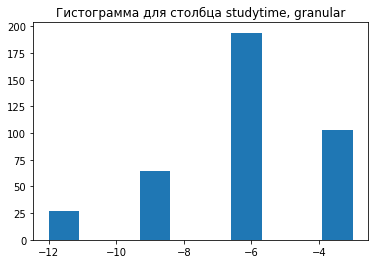

в столбце studytime, granular количество пустных значений 7


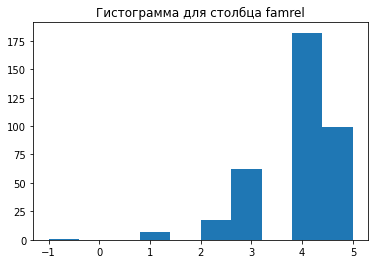

в столбце famrel количество пустных значений 27


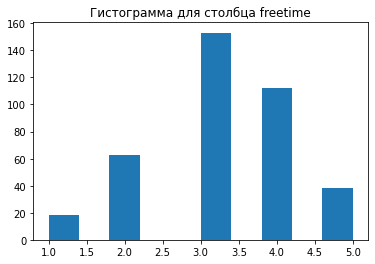

в столбце freetime количество пустных значений 11


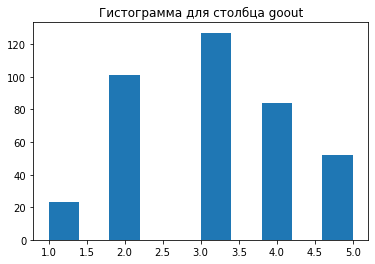

в столбце goout количество пустных значений 8


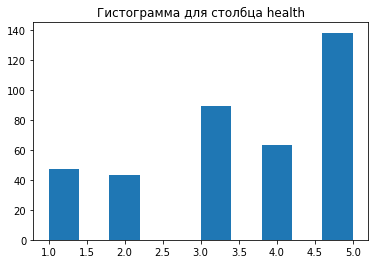

в столбце health количество пустных значений 15


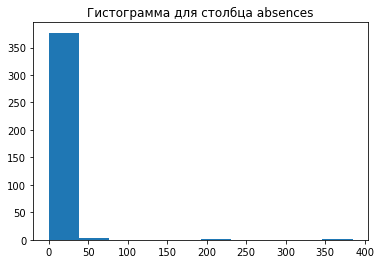

в столбце absences количество пустных значений 12


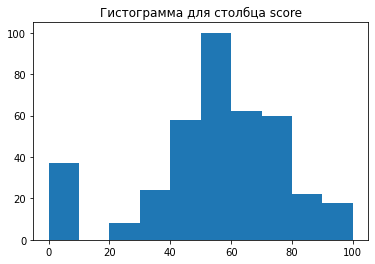

в столбце score количество пустных значений 6


In [147]:
#строим графики распределения значений для всех числовых столбцов
number_graf(stud)

мы видим, что выбросы есть в столбцах Fedu, absences

для столбца famrel есть отрицательное значение, чего быть не должно

# Преобразуем данные для столбцов с выбросами и отрицательными значениями

устраним отрицательное значение в столбце famrel

In [148]:
stud.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [149]:
stud.index[stud.famrel == -1]

Int64Index([25], dtype='int64')

In [150]:
stud.famrel.loc[25] = 1

In [151]:
stud.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

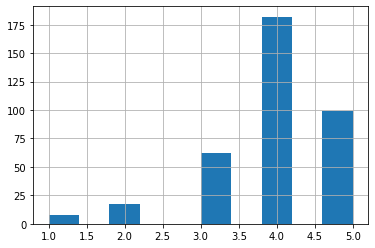

In [152]:
stud.famrel.hist()

Устраним выбросы для absences

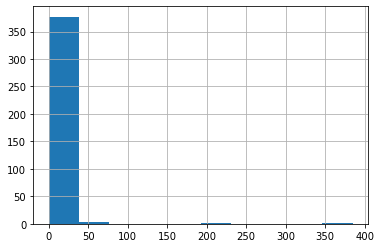

In [153]:
stud.absences.hist()

In [154]:
stud.absences = stud.absences[stud.absences < stud.absences.quantile(0.75) 
                              + 1.5*(stud.absences.quantile(0.75) - stud.absences.quantile(0.25))]

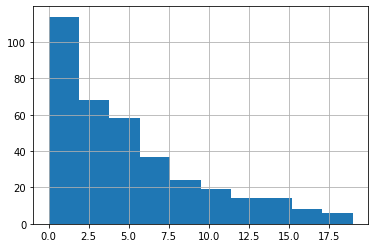

In [155]:
stud.absences.hist()

Устраним выброс для Fedu

In [156]:
stud.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [157]:
stud.index[stud.Fedu == 40]

Int64Index([11], dtype='int64')

In [158]:
#заменяем 40 на 4
stud.Fedu.loc[11] = 4

In [159]:
stud.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

# Рассмотрим номинативные переменные

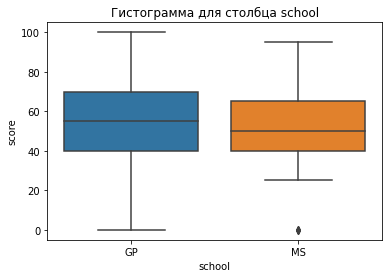

в столбце school количество пустных значений 0


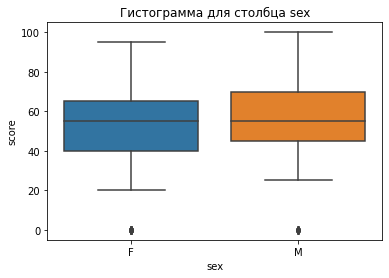

в столбце sex количество пустных значений 0


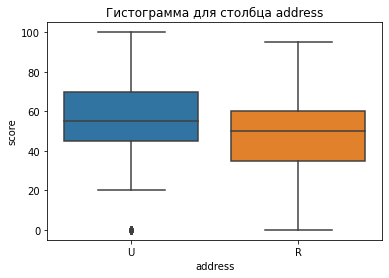

в столбце address количество пустных значений 17


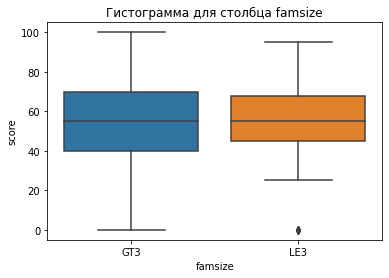

в столбце famsize количество пустных значений 27


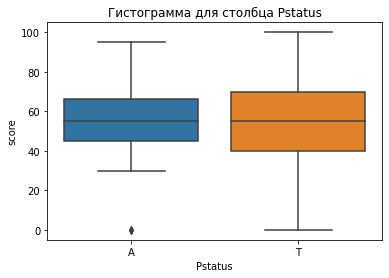

в столбце Pstatus количество пустных значений 45


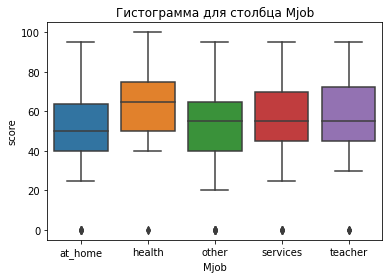

в столбце Mjob количество пустных значений 19


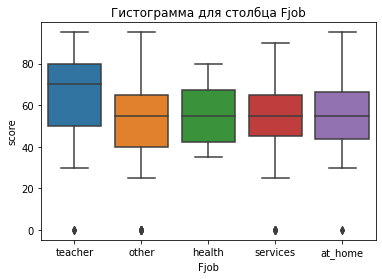

в столбце Fjob количество пустных значений 36


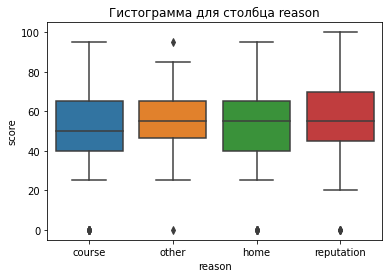

в столбце reason количество пустных значений 17


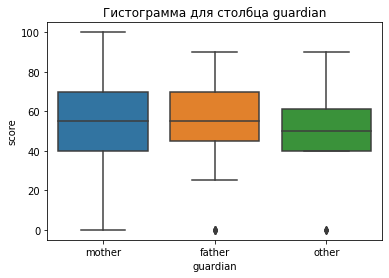

в столбце guardian количество пустных значений 31


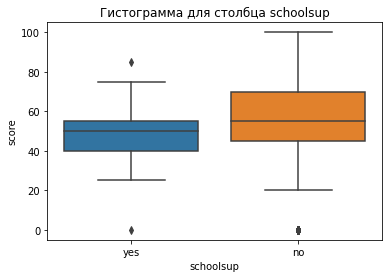

в столбце schoolsup количество пустных значений 9


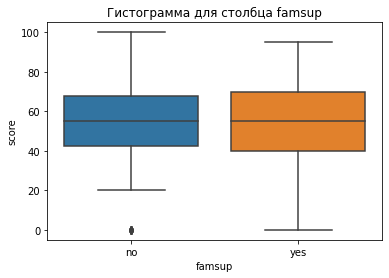

в столбце famsup количество пустных значений 39


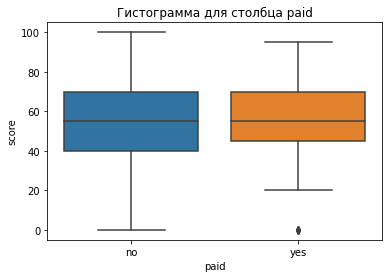

в столбце paid количество пустных значений 40


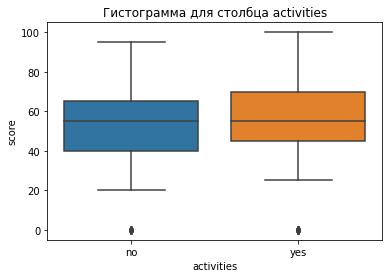

в столбце activities количество пустных значений 14


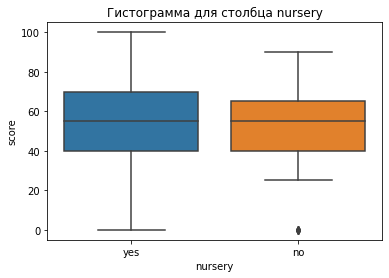

в столбце nursery количество пустных значений 16


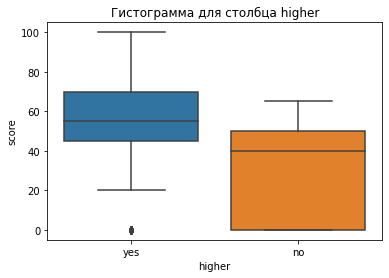

в столбце higher количество пустных значений 20


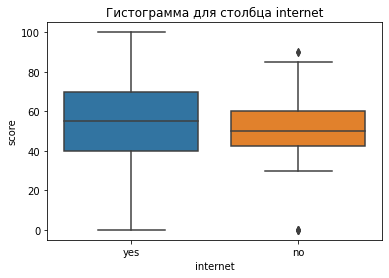

в столбце internet количество пустных значений 34


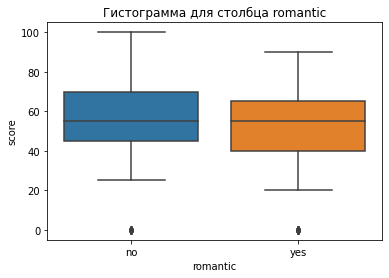

в столбце romantic количество пустных значений 31


In [160]:
#строим boxplot для всех столбцов с номинативными переменными
nominativ_graf(stud)

# Заменим пустые значения в столбцах с числовыми признаками

In [161]:
#заменяем все пустые значения средними в столбце
replace_nan(stud)

проверим, все ли значения заменены

In [162]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            386 non-null    obj

# Посмотрим на корреляцию числовых переменных

In [163]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.161869,0.084755,-0.015355,0.228081,0.015355,0.065250,0.026443,0.134069,-0.063892,0.119582,-0.153481
Medu,-0.161375,1.000000,0.606656,-0.160877,0.077050,-0.245110,-0.077050,-0.013853,0.026210,0.063361,-0.050991,0.090315,0.207583
Fedu,-0.161869,0.606656,1.000000,-0.141115,0.016611,-0.259788,-0.016611,-0.026083,-0.016259,0.042385,0.023242,-0.002039,0.123559
traveltime,0.084755,-0.160877,-0.141115,1.000000,-0.094637,0.049670,0.094637,-0.019040,-0.012496,0.051775,-0.044842,-0.069525,-0.056016
studytime,-0.015355,0.077050,0.016611,-0.094637,1.000000,-0.166598,-1.000000,0.037638,-0.119014,-0.051090,-0.073674,-0.066596,0.114074
failures,0.228081,-0.245110,-0.259788,0.049670,-0.166598,1.000000,0.166598,-0.017230,0.094826,0.113649,0.075849,0.074950,-0.328451
"studytime, granular",0.015355,-0.077050,-0.016611,0.094637,-1.000000,0.166598,1.000000,-0.037638,0.119014,0.051090,0.073674,0.066596,-0.114074
famrel,0.065250,-0.013853,-0.026083,-0.019040,0.037638,-0.017230,-0.037638,1.000000,0.165324,0.074217,0.085947,-0.077671,0.052626
freetime,0.026443,0.026210,-0.016259,-0.012496,-0.119014,0.094826,0.119014,0.165324,1.000000,0.292305,0.060557,0.081677,0.017298
goout,0.134069,0.063361,0.042385,0.051775,-0.051090,0.113649,0.051090,0.074217,0.292305,1.000000,-0.014274,0.120857,-0.127048


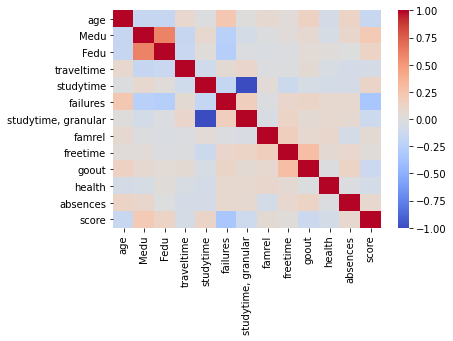

In [164]:
sns.heatmap(stud.corr(), cmap = 'coolwarm')

мы видим, что столбцы 'studytime, granular' и 'studytime' коррелируют полностью, но со знаком минус.

In [165]:
#убираем стоблец 'studytime, granular' из датасета.
stud.drop(['studytime, granular'], inplace = True, axis = 1)

# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента

In [166]:
get_stat_dif(stud)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Определим датасет для построения модели

In [167]:
stud_for_model = stud.loc[:,['age', 'address', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences']]

In [168]:
stud_for_model.head()

,age,address,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,...,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences
0,18,U,4.0,4.0,at_home,teacher,course,2.0,2.0,0.0,...,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0
1,17,U,1.0,1.0,at_home,other,course,1.0,2.0,0.0,...,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0
2,15,U,1.0,1.0,at_home,other,other,1.0,2.0,3.0,...,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0
3,15,U,4.0,2.0,health,NaN,home,1.0,3.0,0.0,...,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0
4,16,U,3.0,3.0,other,other,home,1.0,2.0,0.0,...,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0


все пустые пропуски в столбцах с номинативными переменными в модели заменим значениями моды. 

In [169]:
def replace_nan_nomenativ(data):
    for column in data.columns:
        if str(data[column].dtype) == 'object':
            data[column] = data[column].fillna(data[column].mode()[0])

In [170]:
replace_nan_nomenativ(stud_for_model)

In [171]:
stud_for_model.head()

,age,address,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,...,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences
0,18,U,4.0,4.0,at_home,teacher,course,2.0,2.0,0.0,...,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0
1,17,U,1.0,1.0,at_home,other,course,1.0,2.0,0.0,...,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0
2,15,U,1.0,1.0,at_home,other,other,1.0,2.0,3.0,...,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0
3,15,U,4.0,2.0,health,other,home,1.0,3.0,0.0,...,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0
4,16,U,3.0,3.0,other,other,home,1.0,2.0,0.0,...,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0


# Итоговые выводы

В результате EDA для анализа влияния условий жизни учащихся на успеваемость по математике были получены следующие выводы:

1. В данных содержится много пустых значений.
2. Выбросы были найдены в столбцах Fedu, absences, что позволяет сделать вывод о том, что данные достаточно чистые.
3. Отрицательная корреляция score с параметром age говорит о том, что старшие ученики сдают экзамен по математике успешнее, чем младшие.
4. Положительная корреляция Medu и Fedu может говорить о том, что дети в семьях, где у родителей хорошее образование, успешней сдают экзамен.
5. Отрицательная корреляция score с параметром traveltime говорит о том, что те ученики, которые не тратили время на путешествия, учатся успешней.
6. Положительная корреляция score с параметром studytime позволяет заявить, что результат прямо пропорционально зависит от времени, затраченного на подготовку.
7. Отрицательная корреляция score с параметром failures говорит нам о том, что лучше бы не допускать учебных неудач, если перед вам стоит цель хорошо сдать экзамен.
8. Положительная корреляция score с параметром famrel говорит нам о том, что дети в семьях с хорошими отношениями учатся лучше.
9. Положительная корреляция score с параметром freetime позволяет нам сделать вывод о том, что для лучшей подготовки не следует занимать все свободное время ребенка кружками и секциями.
10. Отрицательная корреляция score с параметром goout говорит нам о том, что общение с друзьями отрицательно сказывается на успеваемости
11. Отрицательная корреляция score с параметром health сообщает нам, что высокие результаты в учебе негативно сказываются на здоровье
12. Положительная корреляция score с параметром absences говорит нам, что пропуск занятий может положительно отразиться на результате экзамена.
13. Место жительства влияет на успеваемость. Ученики, которые живут в городе, сдают экзамены лучше. (address) 
14. У детей, чья мама работает в сфере здоровья результаты выше. (Mjob)
15. У детей, чей отец работает учителем результаты выше. (Fjob)
16. У детей, чья школа была выбрана из-за репутации результаты выше. (reason)
17. Ученики, которые не пользуются дополнительной образовательной поддержкой, сдают экзамен лучше. (schoolsup)
18. Ученики, посещающие дополнительные учебные занятия, сдают экзамен лучше. (activities)
19. Ученики, которые посещали детский сад, сдают экзамен лучше. (nursery)
20. Если у ученика есть планы получить высшее образование, то у него будет заметно выше результат экзамена. (higher)
21. Наличие интернета также способствует высоким результатам экзаменов. (internet)
22. Менее романтичные ученики как правило имеют более высокие результаты. (romantic)
23. Самые важные из номинативных параметров - address, Mjob, higher и romantic.
24. Для построения модели предлагается использовать следующие параметры: age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences, address, Mjob, Fjob, reason, schoolsup, activities, nursery, higher, internet, romantic.
